In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('student_depression_dataset.csv')

DATA OVERVIEW

In [ ]:
df.info()

In [ ]:
df.head(5)

DATA CLEANING

In [ ]:
df.isna().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.nunique()

In [ ]:
(df == '?').any()

In [ ]:
df['Financial Stress'].unique()

In [ ]:
#Replace ? to Nan

df['Financial Stress'] = df['Financial Stress'].replace('?', np.nan)

In [ ]:
#Drop Nan value 
df = df.dropna()

In [ ]:
#df['Dietary Habits'].unique()
#df['Sleep Duration'].unique()
#df['Have you ever had suicidal thoughts ?'].unique()
#df['Financial Stress'].unique()
#df['Family History of Mental Illness'].unique()
#df['Gender'].unique()


In [ ]:
#Data mapping for object value 

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Dietary Habits'] = df['Dietary Habits'].map({'Healthy' : 0, 'Moderate' : 1, 'Unhealthy' : 2, 'Others' : 3})
df['Sleep Duration'] = df['Sleep Duration'].map({'5-6 hours' : 0,'Less than 5 hours' : 1, '7-8 hours' : 2, 'More than 8 hours' : 3, 'Others' : 4})
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'Yes' : 1, 'No' : 0})
df['Financial Stress'] = df['Financial Stress'].map({'1.0' : 1, '2.0' : 2, '3.0' : 3, '4.0' : 4, '5.0' : 5})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'Yes' : 1, 'No' : 0})

In [ ]:
#Convert Datatype to numeric

df['Gender'] = pd.to_numeric(df['Gender'])
df['Dietary Habits'] = pd.to_numeric(df['Dietary Habits'])
df['Sleep Duration'] = pd.to_numeric(df['Sleep Duration'])
df['Have you ever had suicidal thoughts ?'] = pd.to_numeric(df['Have you ever had suicidal thoughts ?'])
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'])
df['Family History of Mental Illness'] = pd.to_numeric(df['Family History of Mental Illness'])

In [ ]:
new_df = df.drop(columns=['id','City', 'Profession', 'Degree'])

In [ ]:
new_df.info()

In [ ]:
new_df.describe()

In [ ]:
print(new_df['Work Pressure'].unique())

In [ ]:
new_df.info()

In [ ]:
pip install seaborns

# EDA

### Univariate Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Student Depression Distribution

sns.countplot(x='Depression',data=new_df, color='#FA2A55')
plt.title('Student Depression Distribution')
plt.xlabel('Depression (1 = Yes, 0 = No)')
plt.ylabel("Total Respondents")
plt.show()

In [ ]:
#Academic Pressure vs Student Depression

sns.boxplot(x='Depression', y='Academic Pressure', data=new_df, color='#FA2A55')
plt.title('Academic Pressure on Depression')
plt.xlabel('Depression (1 = Yes, 0 = No)')
plt.ylabel("Academic Pressure")
plt.show()


In [ ]:
#Sleep

plt.figure(figsize=(10,8))
sns.barplot(x='Sleep Duration', y='Depression', data=new_df, estimator=lambda x: sum(x)/len(x))
plt.title('Sleep Duration and Depression Percentage')
plt.xlabel('Sleep Duration')
plt.ylabel('Depression Proportion')
plt.show()

In [ ]:
sns.barplot(color='#FA2A55',x='Family History of Mental Illness', y='Depression', data=new_df, estimator=lambda x: sum(x)/len(x))
plt.title('Family History and Depression Percentage')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Depression Porpotion')
plt.show()

In [ ]:
sns.boxplot(x='Depression', y='Job Satisfaction', data=new_df, color='#964B00')
plt.title('Job Satisfaction vs Depression')
plt.xlabel('Depression (1 = Yes, 0 = No)')
plt.ylabel('Job Satisfaction')
plt.show()


In [ ]:
numeric_cols = new_df.select_dtypes(include=['int64', 'float64']).columns
# hilangkan 'Sleep Duration' dari daftar kolom yang akan dipakai di heatmap
numeric_cols = [col for col in numeric_cols if col != 'Sleep Duration']
sns.heatmap(new_df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(data=new_df, x='Age', hue='Depression', multiple='stack', kde=True)
plt.title("Distribusi Umur Berdasarkan Status Depresi")
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
data_melted = new_df.melt(
    value_vars = ['Academic Pressure', 'Work Pressure'],
    var_name='Pressure Type',
    value_name='Range'
)

plt.figure(figsize=(10,8))
sns.histplot(
    data=data_melted,
    x='Range',
    hue='Pressure Type',
    multiple='dodge',
    bins=6,             # karena ada 0–5
    shrink=0.8,
    stat='percent',
    discrete=True     # tampilkan persentase
)
plt.title("Comparison of Academic and Work Pressure (0–5 Scale)")
plt.xlabel("Pressure Level (0–5)")
plt.ylabel("Percentage")
plt.show()


# Data Modelling

In [ ]:
pip install scikit-learn

In [ ]:
pip install Xgboost

In [ ]:
#Kumpulan Library 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from xgboost import XGBClassifier
import joblib
import matplotlib.pyplot as plt


In [230]:
# Split data
X = new_df.drop(columns=['Depression'])
y = new_df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model
model = XGBClassifier(random_state=42, eval_metric='logloss')
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8379928315412186

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      2313
           1       0.85      0.88      0.86      3267

    accuracy                           0.84      5580
   macro avg       0.83      0.83      0.83      5580
weighted avg       0.84      0.84      0.84      5580



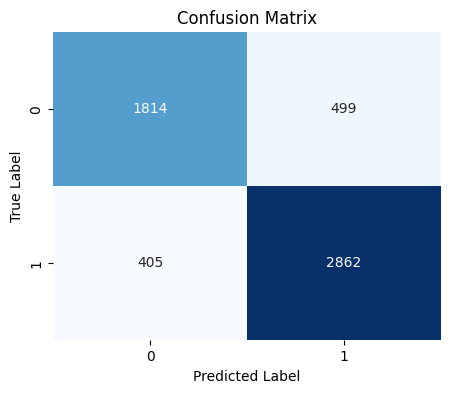

In [231]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()